# Set up

In [24]:
from CONSTANTS import CLASS_NAMES, CLASS_TO_INT, FEATURES
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

########################################################################
# Change file path HERE
########################################################################
csv_filepath = './data/2020-08-01_21-13-46.csv'
# csv_filepath = '~/Downloads/2020-08-01_21-13-46.csv'


df = pd.read_csv(csv_filepath, sep=',', header=0)

# Get dataframes for time and label
time = df['timestamp'] 
label = df['class']

def get_padding(min_val, max_val):
    return abs(min_val - max_val) * 0.05

def plotFeatureArray(sub_part, divide_factor, start, end, feature_name):
    time_split = np.array_split(time, divide_factor)
    label_split = np.array_split(label, divide_factor)
    sample = []
    
    for i in range(start, end + 1, 1):
        sample.append(df[feature_name + '_' + str(i)])

    n_plots = end - start + 1
    fig, ax = plt.subplots(n_plots, 1, figsize=(15, n_plots * 4))

    # Hack to turn single plot axis into numpy array similar to when having many plots
    if not isinstance(ax, np.ndarray):
        ax = [ax]

    for i in range(len(sample)):
        # Divide sample into smaller chunks
        sample_split = np.array_split(sample[i], divide_factor)

        min_val = np.amin(sample_split[sub_part - 1])
        max_val = np.amax(sample_split[sub_part - 1])
        padding = get_padding(min_val, max_val)
        ylim = [ min_val - padding, max_val + padding]

        ax[i].set_ylim(ylim)
        ax[i].set_title(feature_name + '_' + str(start + i))
        ax[i].plot(time_split[sub_part - 1], sample_split[sub_part - 1])
        ax[i].fill_between(
            time_split[sub_part - 1],
            ylim[0], ylim[1],
            where=label_split[sub_part - 1] == CLASS_TO_INT[CLASS_NAMES['CHLOE']],
            color='lightcoral', alpha=0.2)
        ax[i].fill_between(
            time_split[sub_part - 1],
            ylim[0], ylim[1],
            where=label_split[sub_part - 1] == CLASS_TO_INT[CLASS_NAMES['BEEP']],
            color='green', alpha=0.2)
        # ax[i].fill_between(
        #     time_split[sub_part - 1],
        #     ylim[0], ylim[1],
        #     where=label_split[sub_part - 1] == CLASS_TO_INT[CLASS_NAMES['MUSIC']],
        #     color='blue', alpha=0.2)

    # Show plot
    plt.show()


In [25]:
# Plot feature value and its difference between neighboring values
def plotFeature(sub_part, divide_factor, feature, delta, feature_name):
    fig, ax = plt.subplots(2, 1, figsize=(15,14))

    time_split = np.array_split(time, divide_factor)
    label_split = np.array_split(label, divide_factor)

    feature_split = np.array_split(feature, divide_factor)
    delta_split = np.array_split(delta, divide_factor)

    # Plot feature values
    min_val = np.amin(feature_split[sub_part - 1])
    max_val = np.amax(feature_split[sub_part - 1])
    padding = get_padding(min_val, max_val)
    ylim_1 = [ (min_val - padding), (max_val + padding)]
    ax[0].set_title(feature_name)
    ax[0].set_ylim(ylim_1)
    ax[0].plot(time_split[sub_part - 1], feature_split[sub_part - 1], color='dodgerblue')
    ax[0].fill_between(
        time_split[sub_part - 1],
        ylim_1[0], ylim_1[1],
        where=label_split[sub_part - 1] == CLASS_TO_INT[CLASS_NAMES['CHLOE']],
        color='lightcoral', alpha=0.2)

    # Delta (max diff between current and previous 2 values)
    min_val = np.amin(delta_split[sub_part - 1])
    max_val = np.amax(delta_split[sub_part - 1])
    ylim_2 = [ min_val - padding, max_val + padding]
    ax[1].set_title('Delta ' + feature_name)
    ax[1].set_ylim(ylim_2)
    ax[1].plot(time_split[sub_part - 1], delta_split[sub_part - 1], color='darkorange')
    ax[1].fill_between(
        time_split[sub_part - 1],
        ylim_2[0], ylim_2[1],
        where=label_split[sub_part - 1] == CLASS_TO_INT[CLASS_NAMES['CHLOE']],
        color='lightcoral', alpha=0.2)

    # Show plot
    plt.show()

# Plots

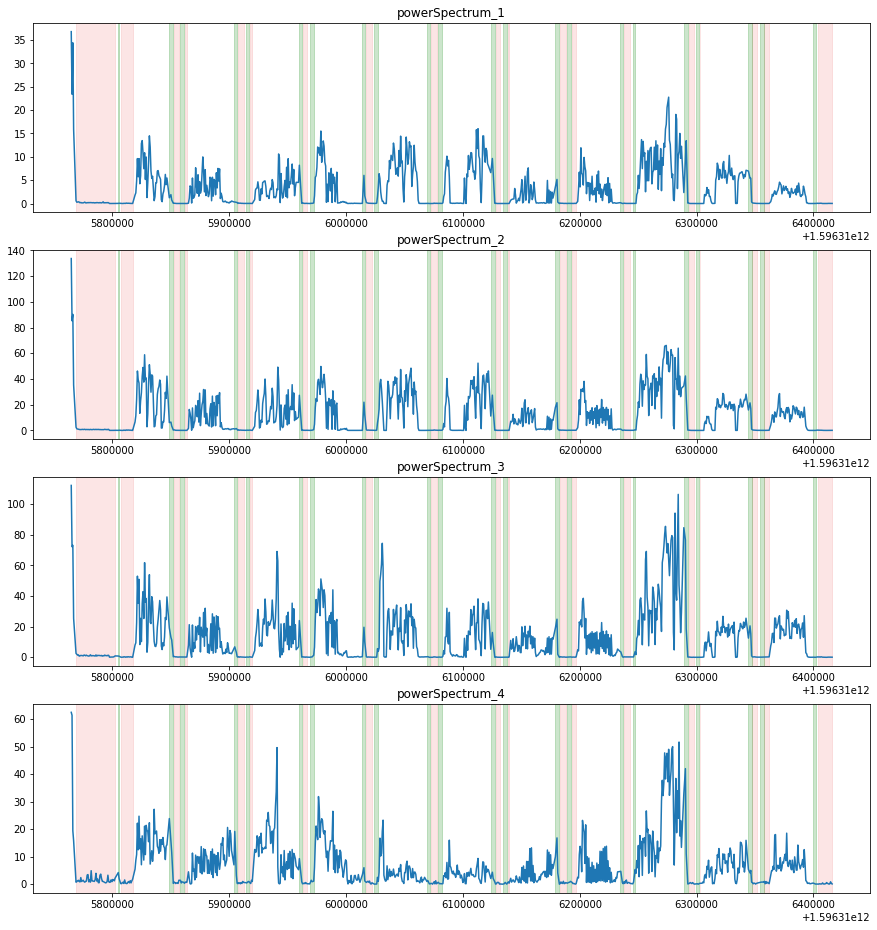

In [26]:
PS_DIVIDE_FACTOR = 1
PS_PART = 1
start_bin = 1
end_bin = 4

plotFeatureArray(PS_PART, PS_DIVIDE_FACTOR, start_bin, end_bin, FEATURES['POWER_SPECTRUM'])

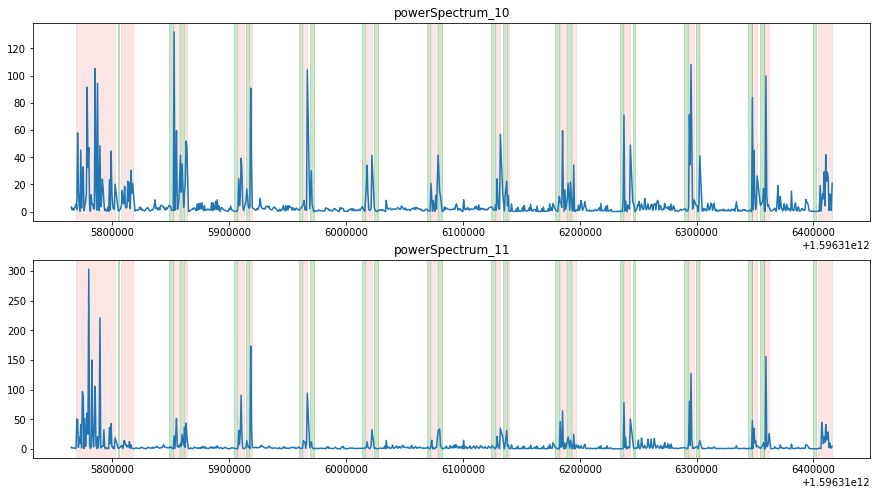

In [27]:
PS_DIVIDE_FACTOR = 1
PS_PART = 1
start_bin = 10
end_bin = 11

plotFeatureArray(PS_PART, PS_DIVIDE_FACTOR, start_bin, end_bin, FEATURES['POWER_SPECTRUM'])

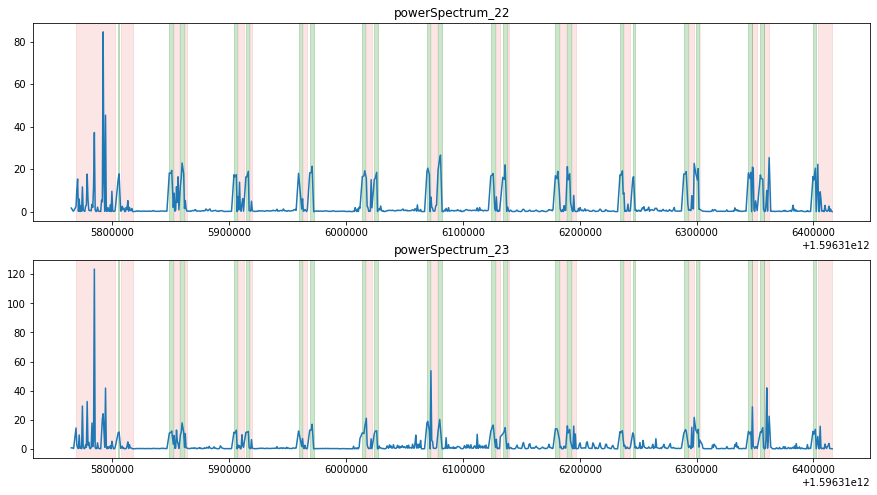

In [28]:
PS_DIVIDE_FACTOR = 1
PS_PART = 1
start_bin = 22
end_bin = 23

plotFeatureArray(PS_PART, PS_DIVIDE_FACTOR, start_bin, end_bin, FEATURES['POWER_SPECTRUM'])

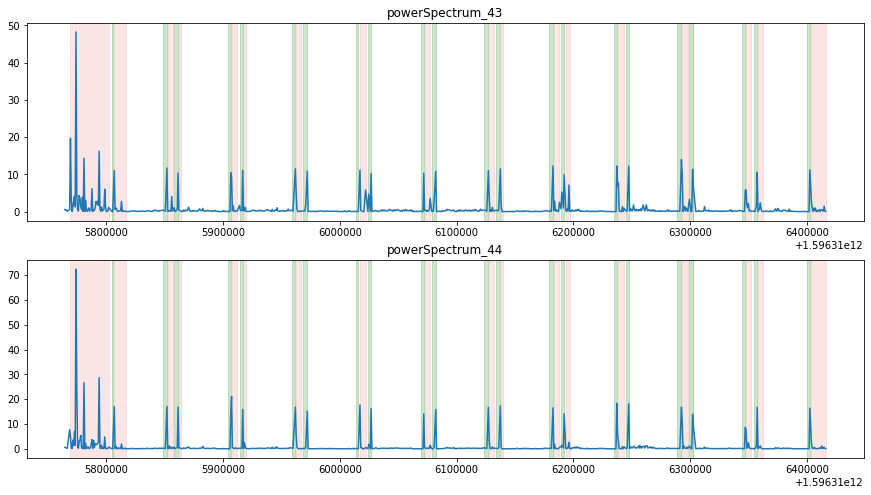

In [29]:
PS_DIVIDE_FACTOR = 1
PS_PART = 1
start_bin = 43
end_bin = 44

plotFeatureArray(PS_PART, PS_DIVIDE_FACTOR, start_bin, end_bin, FEATURES['POWER_SPECTRUM'])

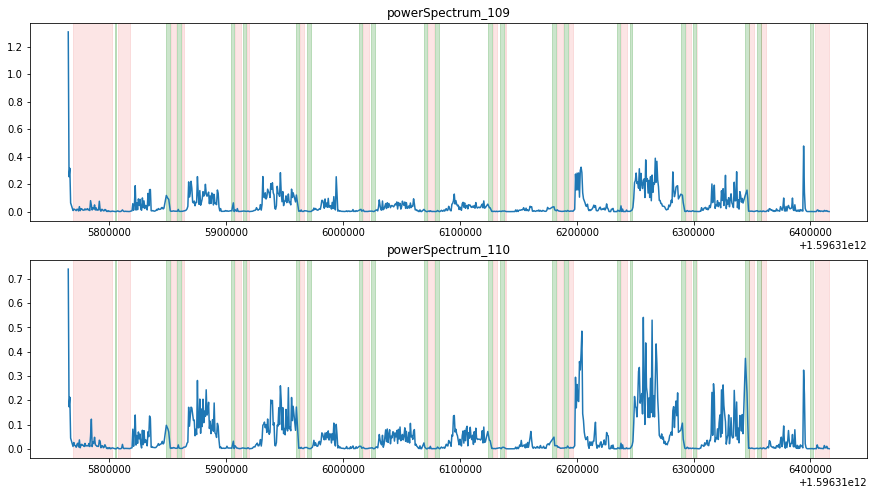

In [30]:
PS_DIVIDE_FACTOR = 1
PS_PART = 1
start_bin = 109
end_bin = 110

plotFeatureArray(PS_PART, PS_DIVIDE_FACTOR, start_bin, end_bin, FEATURES['POWER_SPECTRUM'])

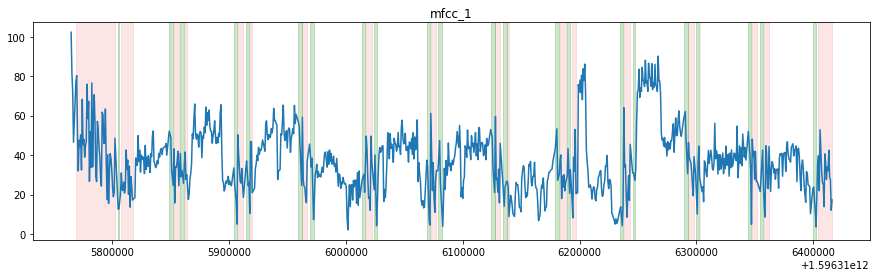

In [31]:
MFCC_DIVIDE_FACTOR = 1
MFCC_PART = 1
first_mfcc = 1
last_mfcc = 1

plotFeatureArray(MFCC_PART, MFCC_DIVIDE_FACTOR, first_mfcc, last_mfcc, FEATURES['MFCC'])

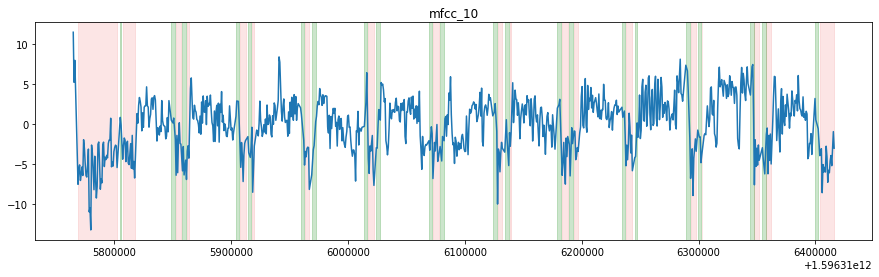

In [32]:
MFCC_DIVIDE_FACTOR = 1
MFCC_PART = 1
first_mfcc = 10
last_mfcc = 10

plotFeatureArray(MFCC_PART, MFCC_DIVIDE_FACTOR, first_mfcc, last_mfcc, FEATURES['MFCC'])

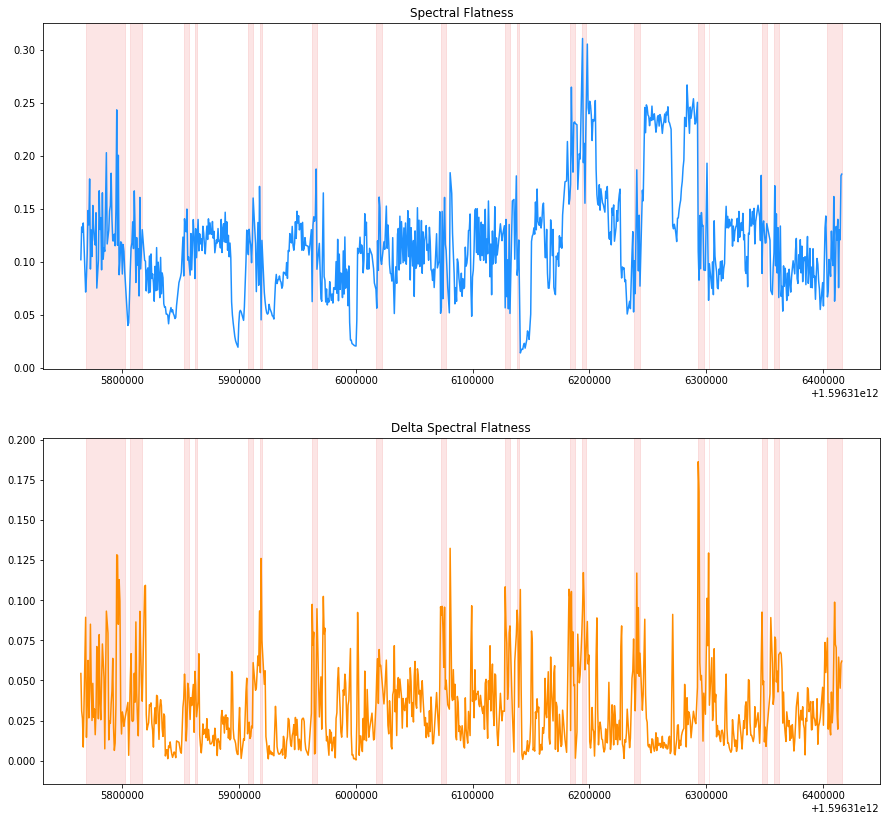

In [33]:
SP_FLATNESS_DIVIDE_FACTOR = 1
SP_FLATNESS_PART = 1
sp_flatness = df[FEATURES['SPECTRAL_FLATNESS']]
delta_sp_flatness = df[FEATURES['DELTA_SPECTRAL_FLATNESS']]

plotFeature(SP_FLATNESS_PART, SP_FLATNESS_DIVIDE_FACTOR, sp_flatness, delta_sp_flatness, 'Spectral Flatness')